In [1]:
# script written by Maartje Oostdijk, with help of Jan Kwakkel, exploration of single species-group mesopelagic SD model,
# EMA script from https://github.com/quaquel/epa1361_open/blob/master/Week%201-2%20-%20general%20intro%20to%20exploratory%20modelling/assignment%201%20-%20tutorial.ipynb
#some uncertainty analyses were taken from scripts written by Julie van Deelen: https://github.com/julievandeelen/Thesis-final
#modeling work done by MO, Laura Elsler, Willem Auping

#import numpy as np
#import matplotlib.pyplot as plt

#from scipy.integrate import odeint

# The mesopelagic fish model differential equations.

#dSd_0 = None

#def deriv(
 #   y,
  #  t,
   # r,
    #K,
    #mm,
   # mt,
    #ft,
    #rt,
    #fr,
    #sp,
    #cd,
    #td,
    #tx,
    #qc,
    #uptake,
    #q,
    #scc,
    #co2,
    #pl,
    #el,
    #lobby,
    #env,
#):
    #M, MM, FM, RM, S, E, C, SCC, TP = y  # all outcome variables
    #global dSd_0

    # population dynamics of zooplankton & mesopelagic fish
    #dMd_t = r * (1 - (M / K)) - mm * M - C  ##logistic growth function mesopelagic fish
    
    # carbon sequestration part mesopelagic fish
    #dMMd_t = mm * M - M / mt  # deadfall MF
    #dFMd_t = fr * r - M / ft  # fecal pellets MF
    #dRMd_t = (1 - fr) * r - M / rt  # respiration MF
    
    # total seq
    #dSd_t = dMMd_t + dFMd_t + dRMd_t
    # social cost of carbon
    #dSCCd_t = S * scc * co2
    # profitability & effort
    #prof = (sp - (cd / td)) * (1 - tx)# profitability is sale price -(cost per day devided by ton per day) times tax rate
    #if (
     #   prof > 100
    #):  # fishery is only taking off if profits are beyond a certain level base this number on
        #e.g. blue whiting fishery profitability (Paoletti et al.2021)
     #   ur = uptake
    #else:
     #   ur = 0
    #dEd_t = prof * ur *0.125 #effort is profitability times uptake rate, 0.125 is conversion from carbon to live weight

    # governance section(protection for carbon seq. function comes into play after yearly carbon
    # seq becomes smaller than XX% of the initial value)
    
    #if t==0:
     #   dSd_0 = dSd_t
    
    #decision = 1
    #if (
     #   prof > pl
    #):  # base this number (pl) on e.g. blue whiting fishery profitability (Paoletti et al.2021)
        #decision = decision * lobby#industry lobby if profitability is high enough
    #if dSd_t < dSd_0 * el:
     #   decision = decision * env#environmental protection once yearly rate of total sequestration by mesopelagic fish goes below a certain level
    #q = q * decision

    #dCd_t = min(E * qc * M, q * M)  # catch with maximum of catch being quota

    #dTPd_t = prof*C*1000000000
    #dPd_t = prof*C
    
    #return dMd_t, dMMd_t, dFMd_t, dRMd_t, dSd_t, dEd_t, dCd_t, dSCCd_t, dTPd_t

#def M_model(
 #   K=0.3,
  #  r=4,
   # M0=0.3,
   # MM0=0,
   # FM0=0,
   # RM0=0,
   # S0=0,
   # E0=0,
   # C0=0,
   # TP0=0,
   # SCC0=0,
   # mm=0.67,
   # mt=851,
   # ft=599,
   # rt=103,
   # fr=0.25,
   # sp=300,
   # cd=17000,
   # td=200,
   # tx=0.2,
   # qc=0.2,
   # scc=100000000000,
   # co2=3.67,
   # pl=150000,#this parameter is not grounded in literature yet
   # el=0.4,
   # lobby=1.2,
   # env=0.8,
   # uptake=0.2,
   # q=0.3,
   # t=np.linspace(0, 50, 50),
#):
    """

    Parameters
    ----------
    K : float
           Carrying capacity, based on level in Anderson et al., 2019
    r : float
            growth rate mesopelagic fish based on Tropfish R parameters for Maurolicus & Benthosema, & Fishbase
    mm : float
            mortality rate of mesopelagic fish based on Anderson et al., 2019
    rt : float
            sequestration time mesopelagic respiration, average time in Pinti et al., 2022
    ft : float
            sequestration time mesopelagic fecal pellets, average time in Pinti et al., 2022
    fr : float
            fraction to fecal of food conversion (Saba et al., 2021)
    mt : float
            sequestration time mesopelagic deadfall, average time in Pinti et al., 2022
    sp : float
            price for mesopelagic fish from Groeneveld et al. 2022
    cd : float
            cost per day Groeneveld et al., 2022; Kourantidou & Jin 2022
    td: float
        tonne per day, sumerised in Groeneveld et al. 2022
    tx: float
        tax rate, assumption, Groeneveld et al., 2022
    qc: float
    catchability, low in Kaartveld et al., 2012
    scc: float
    social cost of carbon, Interagency Working Group on Social Cost of Greenhouse Gases, 2021.
    co2: float
    conversion carbon to co2
    pl: float
        assumption/scenario
    el: float
        assumption/scenario
    M0 : int
         initial value mesopelagic fish
    MM0 : int
         carbon seq. mesopelagic fish
    t : ndarray
        points in time

    """

    # Initial conditions vector
    #y0 = M0, MM0, FM0, RM0, S0, E0, C0, SCC0,TP0
    # Integrate the SIR equations over the time grid, t.
    #ret = odeint(
     #   deriv,
      #  y0,
     #   t,
     #   args=(
     #       r,
     #       K,
     #       mm,
     #       mt,
     #       ft,
     #       rt,
     #       fr,
     #       sp,
     #       cd,
     #       td,
     #       tx,
     #       qc,
     #       uptake,
     #       q,
     #       scc,
     #       co2,
     #       pl,
     #       el,
     #       lobby,
     #       env,
     #   ),
    #)
    #M, MM, FM, RM, S, E, C, SCC,TP = ret.T

    #return {
     #   "Mesofish": M,
     #   "MM": MM,
     #   "FM": FM,
     #   "RM": RM,
     #   "Total seq": S,
     #   "effort": E,
     #   "catch": C,
     #   "SCC": SCC,
     #   "total_profit":TP,
    #}

IndentationError: unexpected indent (1863330670.py, line 119)

In [2]:
from ses_model import M_model

In [45]:
#runs over uncertainties
from ema_workbench import Model, RealParameter, CategoricalParameter, TimeSeriesOutcome

model = Model("Mmodel", function=M_model)

model.uncertainties = [
    RealParameter("r", 2, 8),
    RealParameter("K", 0.2, 0.6),
    RealParameter("mm", 0.35, 5),
    RealParameter("mt", 430, 1700),
    RealParameter("ft", 300, 1200),
    RealParameter("rt", 50, 200),
    RealParameter("fr", 0.2, 0.3),
    RealParameter("scc", 100000000000, 500000000000),
    RealParameter("td", 200, 600),
    RealParameter("sp",150, 600),
    RealParameter("cd", 9000, 30000),
    RealParameter("qc", 0.1, 0.4),
    RealParameter("q", 0.2, 0.6),
]

model.outcomes = [
    TimeSeriesOutcome("Mesofish"),
    TimeSeriesOutcome("Total seq"),
    TimeSeriesOutcome("SCC"),
    TimeSeriesOutcome("catch"),
    TimeSeriesOutcome("total_profit"),
]

model.levers = [
    RealParameter("lobby", 1.1, 2),
    RealParameter("env", 0.5, 0.8),
]

# specify outcomes
#model.outcomes = [
 #   ScalarOutcome("Mesofish", ScalarOutcome.MAXIMIZE),
 #   ScalarOutcome("Total seq", ScalarOutcome.MAXIMIZE),
 #   ScalarOutcome("catch", ScalarOutcome.MAXIMIZE),
#]
 


In [46]:
from ema_workbench import (SequentialEvaluator, save_results,
                          MultiprocessingEvaluator)


with MultiprocessingEvaluator(model) as evaluator: 
   results = evaluator.perform_experiments(scenarios=100, policies=1)

save_results(results, 'C:/Users/Maartje Oostdijk/Dropbox/Thesis-final-main/Data/results.tar.gz')


[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
C:\Users\Maartje Oostdijk\AppData\Roaming\Python\Python39\site-packages\ema_workbench\em_framework\outcomes.py:509: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to C:\Users\Maartje Oostdijk\Dropbox\Thesis-final-main\Data\results.tar.gz


In [48]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis.plotting import kde_over_time
import seaborn as sns

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = 'C:/Users/Maartje Oostdijk/Dropbox/Thesis-final-main/Data/results.tar.gz' 

experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded successfully from C:\Users\Maartje Oostdijk\Dropbox\Thesis-final-main\Data\results.tar.gz


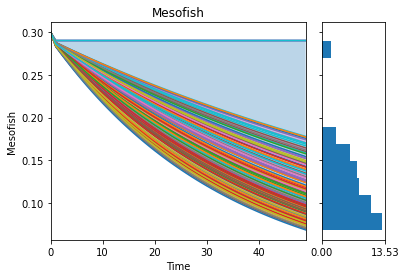

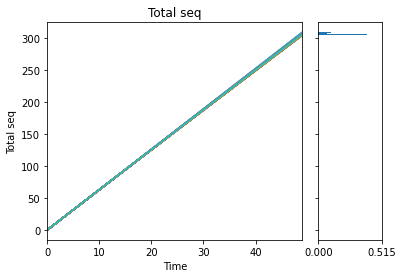

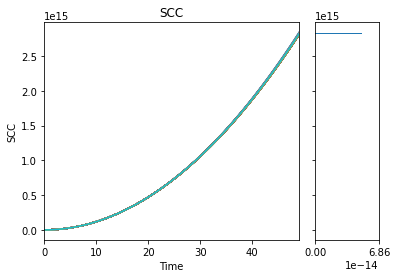

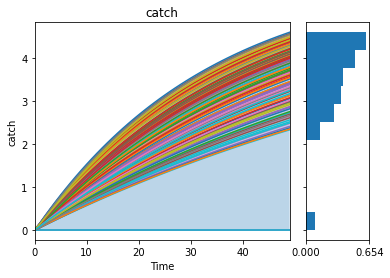

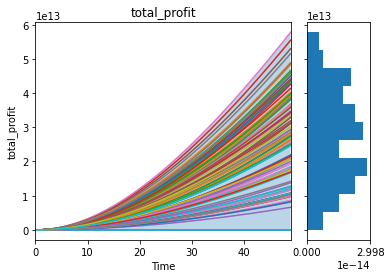

In [49]:
from ema_workbench.analysis import plotting, plotting_util

for outcome in outcomes.keys():
    plotting.lines(
        experiments,
        outcomes,
        outcomes_to_show=outcome,
        density=plotting_util.Density.HIST,
        show_envelope=True,
    )
plt.show()

[MainProcess/WARNING] singular matrix
C:\Users\Maartje Oostdijk\AppData\Roaming\Python\Python39\site-packages\ema_workbench\analysis\plotting_util.py:371: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix
[MainProcess/WARNING] singular matrix


Text(0.5, 69.98758620689655, 'Time (2020-2070)')

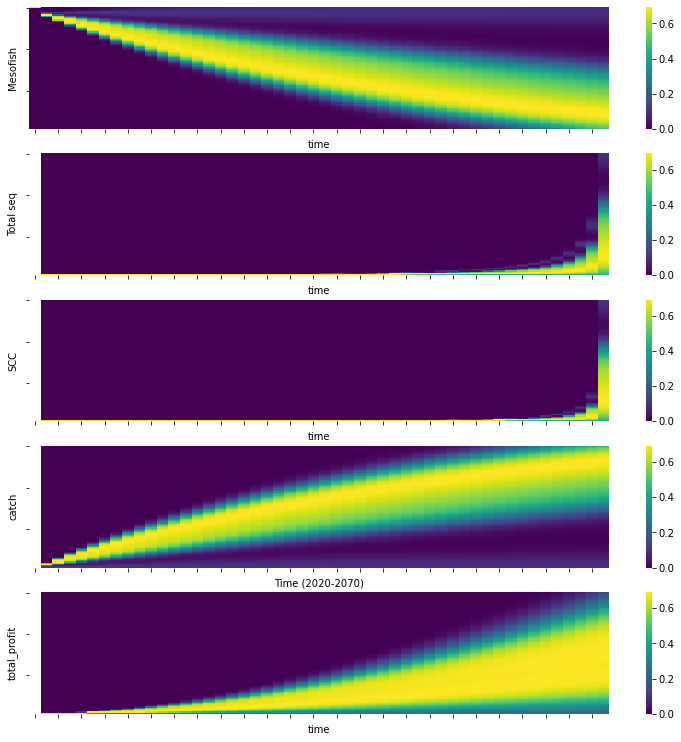

In [50]:
from ema_workbench.analysis.plotting import kde_over_time
import matplotlib.pyplot as plt

fig, axes = kde_over_time(experiments, outcomes, log=True)
ax = fig.get_axes()
fig.set_size_inches(13,13)

ax[3].set_xlabel('Time (2020-2070)')

#plt.savefig('kde7_all4-withfishingnewmodel.png')


[2.82262134e+15 2.81105960e+15 2.81537224e+15 2.81049283e+15
 2.82392192e+15 2.81219183e+15 2.81071303e+15 2.82205747e+15
 2.81218472e+15 2.82596883e+15 2.84005391e+15 2.81363015e+15
 2.81326082e+15 2.81898132e+15 2.81575545e+15 2.81797977e+15
 2.82546540e+15 2.81483416e+15 2.81492245e+15 2.81305911e+15
 2.81949355e+15 2.81431197e+15 2.82079881e+15 2.82261375e+15
 2.84005391e+15 2.81806694e+15 2.81742435e+15 2.81278417e+15
 2.81135233e+15 2.82744602e+15 2.81980454e+15 2.81831091e+15
 2.81356853e+15 2.81516304e+15 2.81655010e+15 2.82562918e+15
 2.81826542e+15 2.81032125e+15 2.81845871e+15 2.82628690e+15
 2.82034069e+15 2.82216038e+15 2.81415826e+15 2.81140312e+15
 2.82400704e+15 2.81021301e+15 2.82123375e+15 2.81222626e+15
 2.82361591e+15 2.82488534e+15 2.82324602e+15 2.81240077e+15
 2.81410271e+15 2.81186801e+15 2.84005391e+15 2.82309318e+15
 2.81626119e+15 2.82089109e+15 2.81057202e+15 2.84005391e+15
 2.81560594e+15 2.81906685e+15 2.81772232e+15 2.81201586e+15
 2.81564999e+15 2.825114

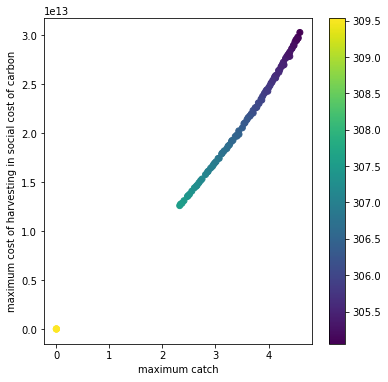

In [51]:
import matplotlib.pyplot as plt
import numpy as np

seq = outcomes['Total seq']
maxseq = np.max(seq, axis=1)

catch = outcomes['catch']
maxcatch = np.max(catch, axis=1)
scc = outcomes['SCC']
maxscc = np.max(scc, axis=1)

print(maxscc)
socialcost = (maxscc-2840053909602230)*-1
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(maxcatch, socialcost,c=maxseq)
plt.colorbar(sc)
ax.set_xlabel('maximum catch')
ax.set_ylabel('maximum cost of harvesting in social cost of carbon')
#plt.show()

plt.savefig('correlation.png')

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Maartje Oostdijk\AppData\Roaming\Python\Python39\site-packages\ema_workbench\analysis\feature_scoring.py:389: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

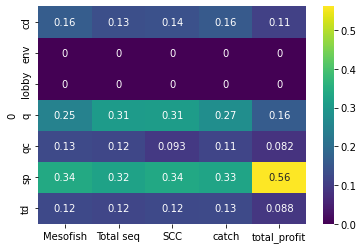

In [32]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

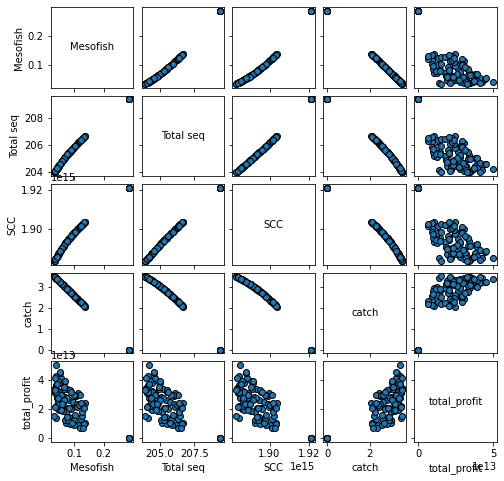

In [33]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()